In [1]:
%matplotlib inline

import os
import json

import PIL
import cv2

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})

from tqdm import tqdm
from pycocotools.coco import COCO

In [3]:
data_path = '/opt/ml/detection/dataset'
annotations_path = os.path.join(data_path, 'train.json')

In [2]:
with open('./train.json', 'r') as f:
    dataset = json.load(f)
    
images = dataset['images']
annotations = dataset['annotations']
categories = dataset['categories']

In [9]:
ratios_all, ratios_small, ratios_middle, ratios_large = [], [], [], []
areas_all, areas_small, areas_middle, areas_large = [], [], [], []

small = 32**2
middle = 96**2

for anno in annotations:
    ratio = anno['bbox'][2] / anno['bbox'][3]
    area = anno['area']
    ratios_all.append(ratio)
    areas_all.append(area)
    
    if area < small:
        ratios_small.append(ratio)
        areas_small.append(area)
    elif area < middle:
        ratios_middle.append(ratio)
        areas_middle.append(area)
    else:
        ratios_large.append(ratio)
        areas_large.append(area)

In [4]:
np.mean(ratios_all)

1.2987072717328514

In [5]:
print(len(ratios_small), len(ratios_middle), len(ratios_large))
a = [len(ratios_small), len(ratios_middle), len(ratios_large)]

3017 8272 11855


<BarContainer object of 3 artists>

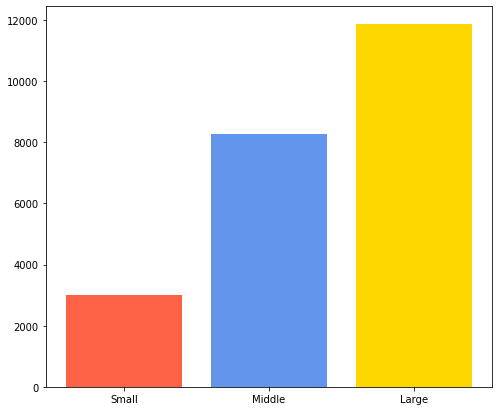

In [6]:
plt.subplots(figsize=(16, 7))
plt.bar(x=["Small", "Middle", "Large"], height=a, color=['tomato', 'cornflowerblue', 'gold'])
plt.bar(x=["Small", "Middle", "Large"], height=a, color=['tomato', 'cornflowerblue', 'gold'])

In [8]:
len(ratios_all)

23144

In [9]:
def draw_histo(level: str):
    ratios = eval(f'ratios_{level}')
    plt.figure(figsize=(12,7))
    y, x, _ = plt.hist(x=ratios,bins=100,range=(-1,10))
    plt.xticks(ticks=list(np.arange(-1, 10,0.5)))
    plt.xlim(-0.3, 10.3)
    plt.title(f'box ratio_{level} (w/h) histogram',fontsize=20)
    plt.axvspan(np.mean(ratios)-0.1, np.mean(ratios)+0.1, color='red', alpha=0.5)
    plt.text(max(x)*0.8, max(y)*0.85, f'Mean Ratio : {np.mean(ratios):.02f}')
    if level != 'all':
        plt.text(max(x)*0.8, max(y)*0.8, f"ratio Percent : {len(ratios) / len(ratios_all) * 100:.2f}%")
    plt.show()

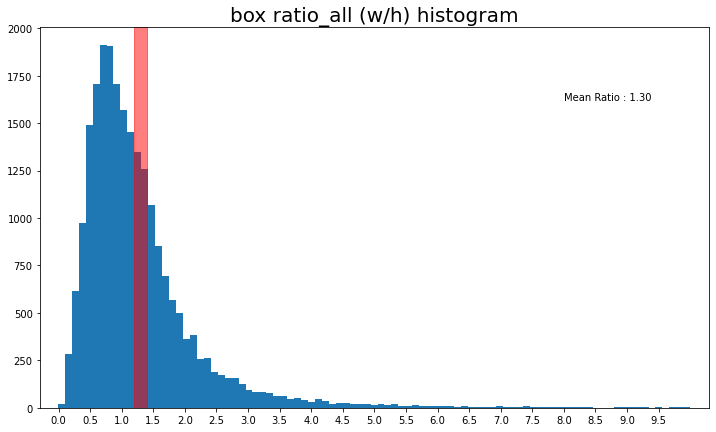

In [10]:
draw_histo('all')

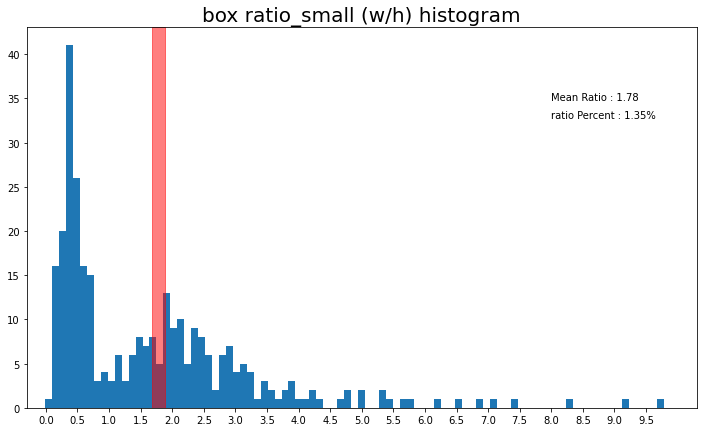

In [11]:
draw_histo('small')

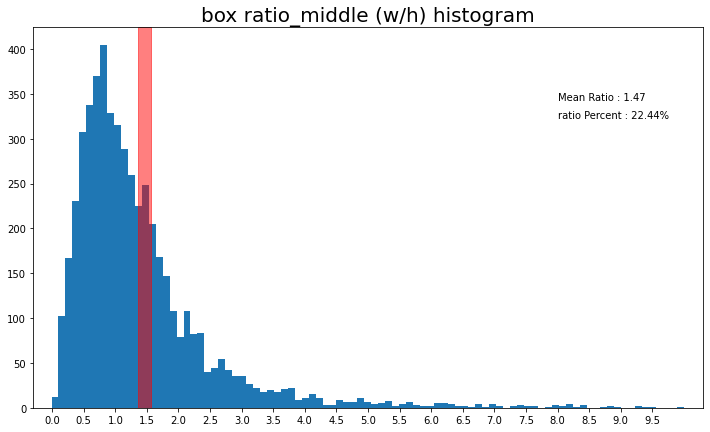

In [12]:
draw_histo('middle')

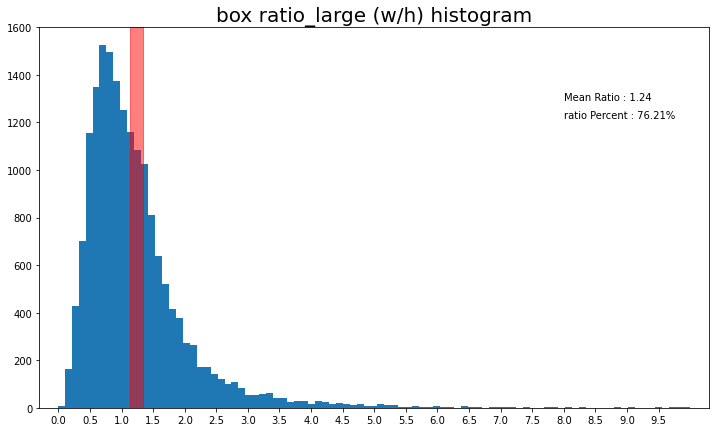

In [13]:
draw_histo('large')

In [14]:
for anno in annotations:
    x, y, w, h = anno['bbox']
    anno['x'] = x
    anno['y'] = y
    anno['w'] = w
    anno['h'] = h

annotations_df = pd.DataFrame.from_dict(annotations)

In [15]:
annotations_df[annotations_df['area'] < 300]

,image_id,category_id,area,bbox,iscrowd,id,x,y,w,h
5067,1056,5,105.08,"[530.6, 70.9, 14.2, 7.4]",0,5067,530.6,70.9,14.2,7.4
5159,1063,0,0.56,"[647.8, 460.2, 0.7, 0.8]",0,5159,647.8,460.2,0.7,0.8
6539,1377,1,3.12,"[719.8, 604.7, 1.3, 2.4]",0,6539,719.8,604.7,1.3,2.4
7227,1521,3,275.12,"[728.4, 307.8, 36.2, 7.6]",0,7227,728.4,307.8,36.2,7.6
17594,3712,2,66.25,"[883.8, 638.5, 12.5, 5.3]",0,17594,883.8,638.5,12.5,5.3


In [16]:
def draw_histo_area(level: str):
    areas = eval(f'areas_{level}')
    plt.figure(figsize=(12,7))
    y, x, _ = plt.hist(x=areas,bins=100)
    plt.title(f'box areas_{level} (w/h) histogram',fontsize=20)
    plt.text(max(x)*0.8, max(y)*0.85, f'Mean areas : {np.mean(areas):.02f}')
    if level != 'all':
        plt.text(max(x)*0.8, max(y)*0.8, f"areas Percent : {sum(areas) / sum(areas_all) * 100:.2f}%")
    plt.show()

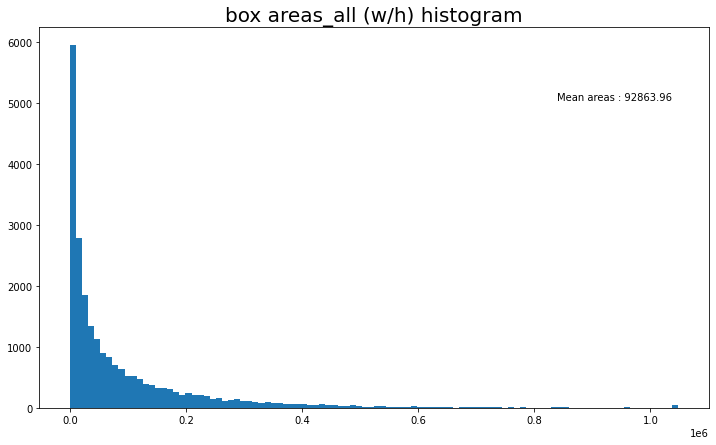

In [17]:
draw_histo_area('all')

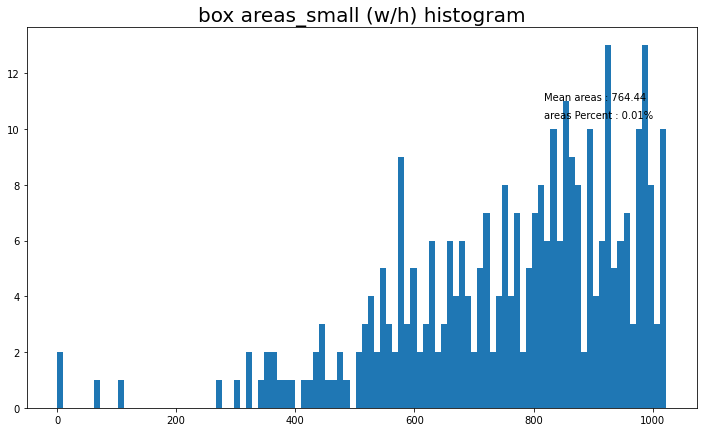

In [19]:
draw_histo_area('small')

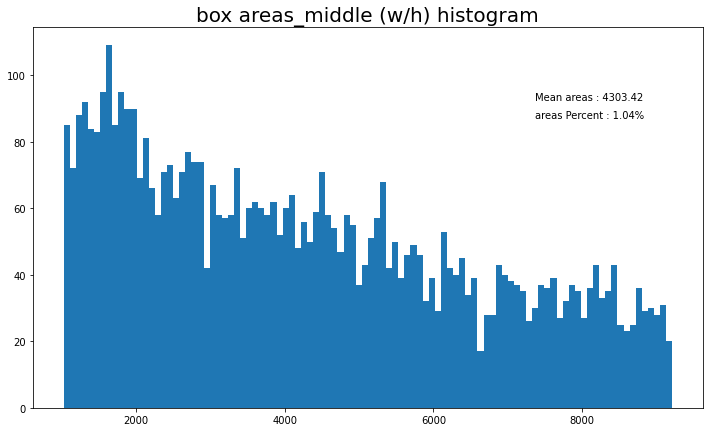

In [20]:
draw_histo_area('middle')

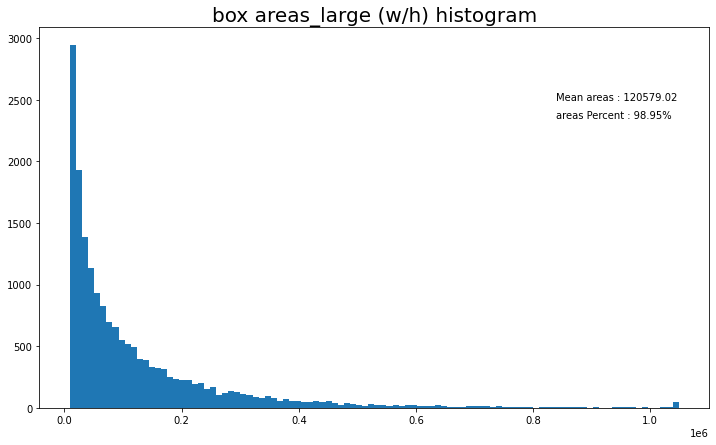

In [21]:
draw_histo_area('large')

In [22]:
ratios_all, ratios_small, ratios_middle, ratios_large = [], [], [], []
areas_all, areas_small, areas_middle, areas_large = [], [], [], []

small = 32**2*4
middle = 96**2*4

for anno in annotations:
    area = anno['area']
    ratio = anno['bbox'][2] / anno['bbox'][3]
    x, y = anno['bbox'][2], anno['bbox'][3]

    new_ratio = x / y
    new_area = x * y
    ratios_all.append(new_ratio)
    areas_all.append(new_area)
    
    if area < small:
        ratios_small.append(new_ratio)
        areas_small.append(new_area)
    elif area < middle:
        ratios_middle.append(new_ratio)
        areas_middle.append(new_area)
    else:
        ratios_large.append(new_ratio)
        areas_large.append(new_area)

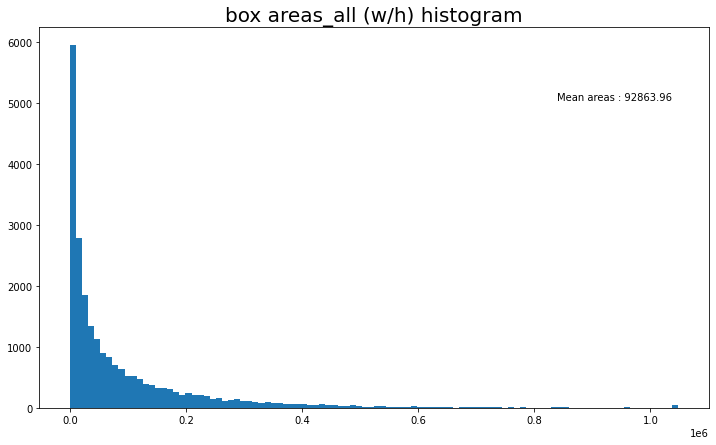

In [23]:
draw_histo_area('all')

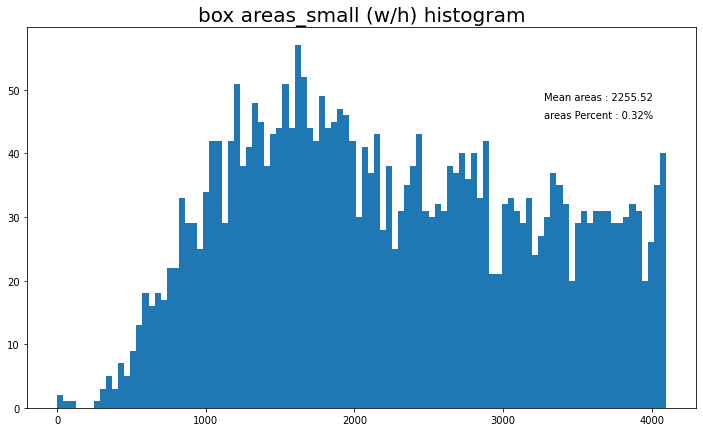

In [24]:
draw_histo_area('small')

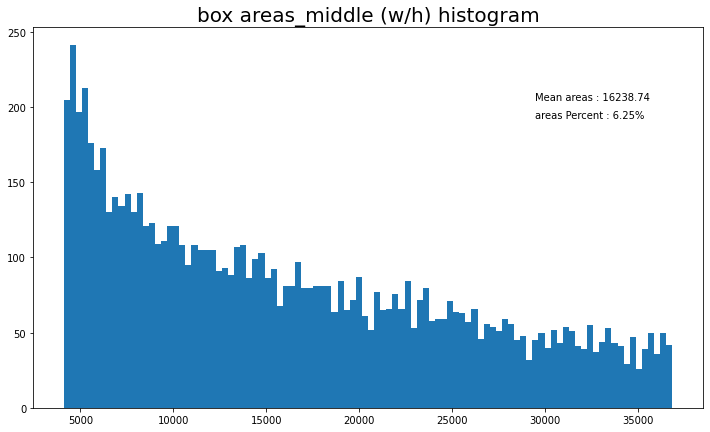

In [25]:
draw_histo_area('middle')

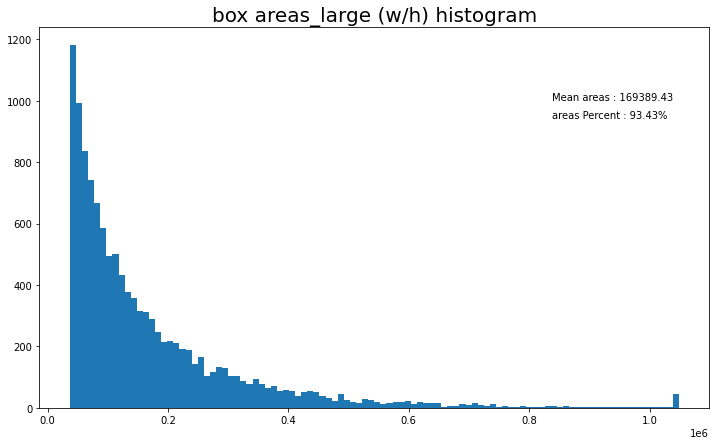

In [26]:
draw_histo_area('large')

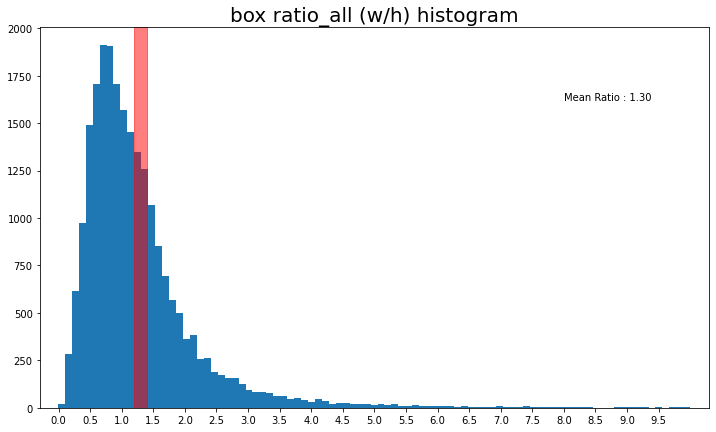

In [27]:
draw_histo('all')

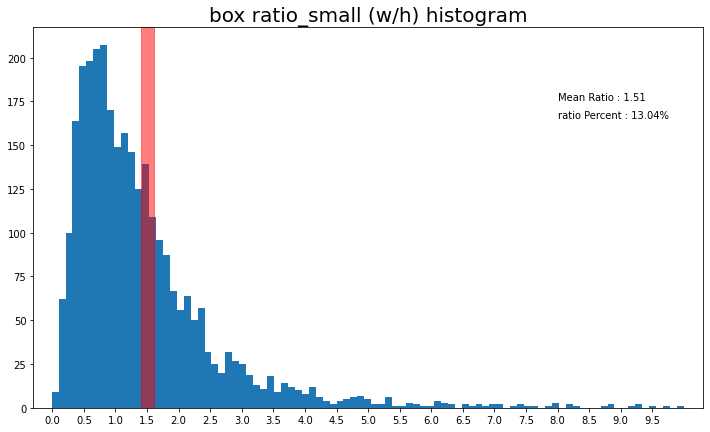

In [28]:
draw_histo('small')

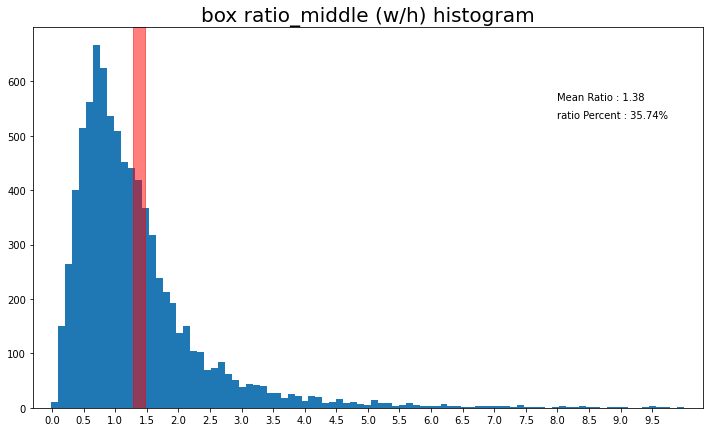

In [29]:
draw_histo('middle')

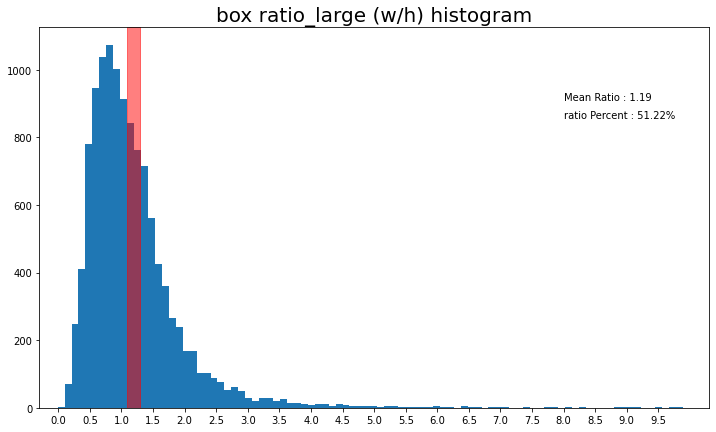

In [30]:
draw_histo('large')

In [31]:
for anno in annotations:
    anno['x'] = anno['bbox'][0]
    anno['y'] = anno['bbox'][1]
    anno['w'] = anno['bbox'][2]
    anno['h'] = anno['bbox'][3]

In [32]:
annotations_df = pd.DataFrame.from_dict(annotations)

In [97]:
annotations_df[annotations_df['area'] < 300]

,image_id,category_id,area,bbox,iscrowd,id,x,y,w,h
5067,1056,5,105.08,"[530.6, 70.9, 14.2, 7.4]",0,5067,530.6,70.9,14.2,7.4
5159,1063,0,0.56,"[647.8, 460.2, 0.7, 0.8]",0,5159,647.8,460.2,0.7,0.8
6539,1377,1,3.12,"[719.8, 604.7, 1.3, 2.4]",0,6539,719.8,604.7,1.3,2.4
7227,1521,3,275.12,"[728.4, 307.8, 36.2, 7.6]",0,7227,728.4,307.8,36.2,7.6
17594,3712,2,66.25,"[883.8, 638.5, 12.5, 5.3]",0,17594,883.8,638.5,12.5,5.3
